#EDA Preprocess on three combined dataset i.e hate speech offensive, measuring hate speech, Twitter Tweets Sentiment 



> Analysis performed by Ameya Chaudhari



Downloading required libraries

In [ ]:
!pip install textstat

In [ ]:
!pip install texthero

In [ ]:
!pip install spacy==3.4

Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import texthero as hero
import matplotlib.pyplot as plt
import textstat as ts
sns.set()

Getting the data to data DataFrame

In [6]:
df = pd.read_csv('clean dataset.csv')
df.head()

,Id,clean sentence training,label,clean sentence EDA
0,1,woman complain clean house amp man always take...,0,as a woman you shouldn t complain about cleani...
1,2,boy dats cold tyga dwn bad cuffin dat hoe st p...,1,boy dats cold tyga dwn bad for cuffin dat hoe ...
2,3,dawg ever fuck bitch start cry confuse shit,1,dawg you ever fuck a bitch and she start to cr...
3,4,look like tranny,1,she look like a tranny
4,5,shit hear might true might faker bitch tell ya,1,the shit you hear about me might be true or it...


checking if there are any null values

In [7]:
df.isnull().sum()

Id                          0
clean sentence training    31
label                       0
clean sentence EDA          0
dtype: int64

droping null rows from dataset

In [8]:
df.dropna(axis=0,inplace=True)

ploting a pie chart on label column

In [9]:
keys = ['non risky', 'potenially risky', 'risky']

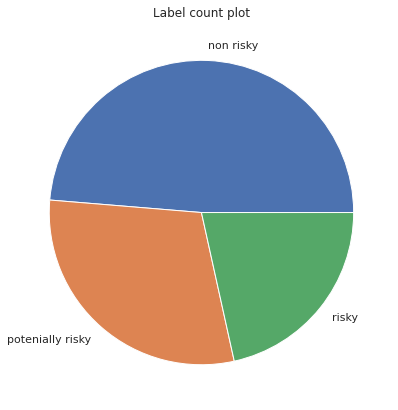

In [10]:
plt.figure(figsize = (10,7))
plt.pie(df['label'].value_counts(), labels = keys)
plt.title('Label count plot')
plt.show() 

we clearly see that data is a imbalance

Removing the stop words on eda sentence

In [11]:
df['clean sentence EDA'] = hero.preprocessing.remove_stopwords(df['clean sentence EDA'])

Visualizing top 20 highly frequent words on bar chart

In [12]:
top = hero.visualization.top_words(df['clean sentence EDA']).head(20)

In [13]:
top_df = pd.DataFrame(top)
top_df.reset_index(inplace=True)
top_df.rename(columns = {'index':'Top 20 words'}, inplace = True)

In [14]:
top_df.head()

,Top 20 words,clean sentence EDA
0,bitch,9518
1,like,5224
2,fuck,3554
3,bitches,3409
4,get,3250


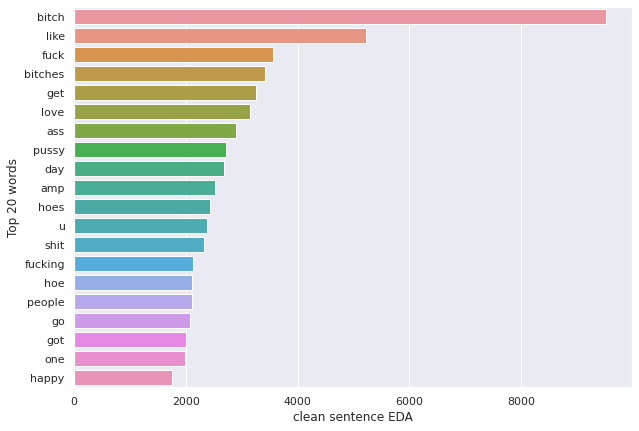

In [22]:
plt.figure(figsize=(10, 7))
sns.barplot(x = 'clean sentence EDA', y= 'Top 20 words', data = top_df)
plt.show()

> Score	Difficulty


90-100	Very Easy

80-89	Easy

70-79	Fairly Easy

60-69	Standard

50-59	Fairly Difficult

30-49	Difficult

0-29	Very Confusing


Applying Flesch Reading Ease formula readability test to assess the ease of readability in a statement.
please refer above table score and check where the score lies

In [16]:
 df['readability score'] = df['clean sentence EDA'].apply(lambda x : ts.flesch_reading_ease(x))

In [17]:
df.head()

,Id,clean sentence training,label,clean sentence EDA,readability score
0,1,woman complain clean house amp man always take...,0,woman complain cleaning house amp ma...,79.26
1,2,boy dats cold tyga dwn bad cuffin dat hoe st p...,1,boy dats cold tyga dwn bad cuffin dat hoe s...,94.15
2,3,dawg ever fuck bitch start cry confuse shit,1,dawg ever fuck bitch start cry confused...,88.74
3,4,look like tranny,1,look like tranny,93.81
4,5,shit hear might true might faker bitch tell ya,1,shit hear might true might faker bit...,104.64


applying statistics on dataset

In [18]:
df.describe()

,Id,label,readability score
count,62756.000000,62756.000000,62756.000000
mean,31390.926891,0.728488,66.707343
std,18128.426696,0.792832,34.442009
min,1.000000,0.000000,-516.330000
25%,15689.750000,0.000000,47.790000
50%,31385.500000,1.000000,71.820000
75%,47094.250000,1.000000,90.770000
max,62787.000000,2.000000,121.220000


Visualizing most frequent words on wordcloud




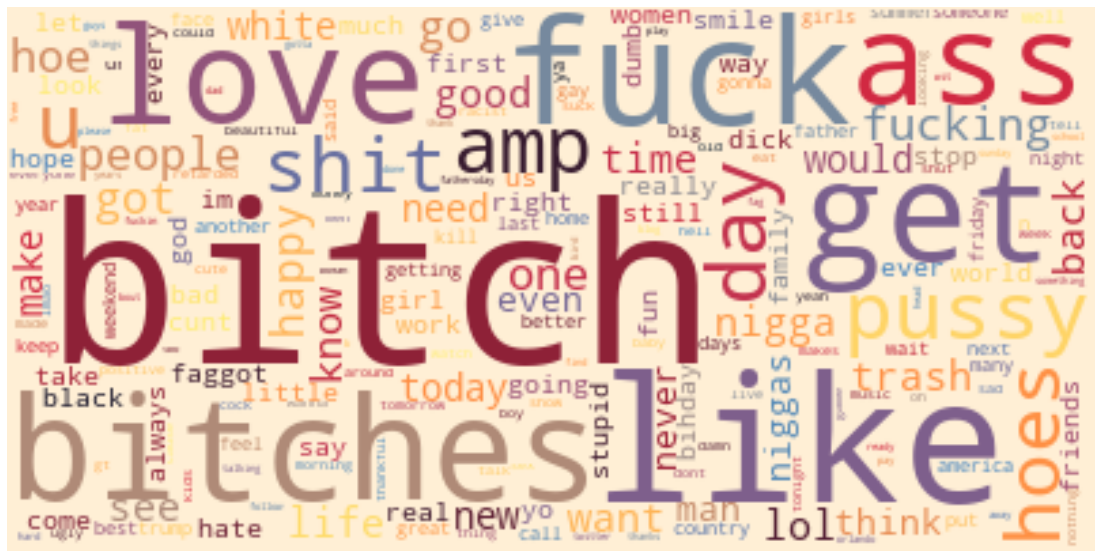

In [23]:
hero.visualization.wordcloud(df['clean sentence EDA'].apply(str))

crosschecking on training sentence

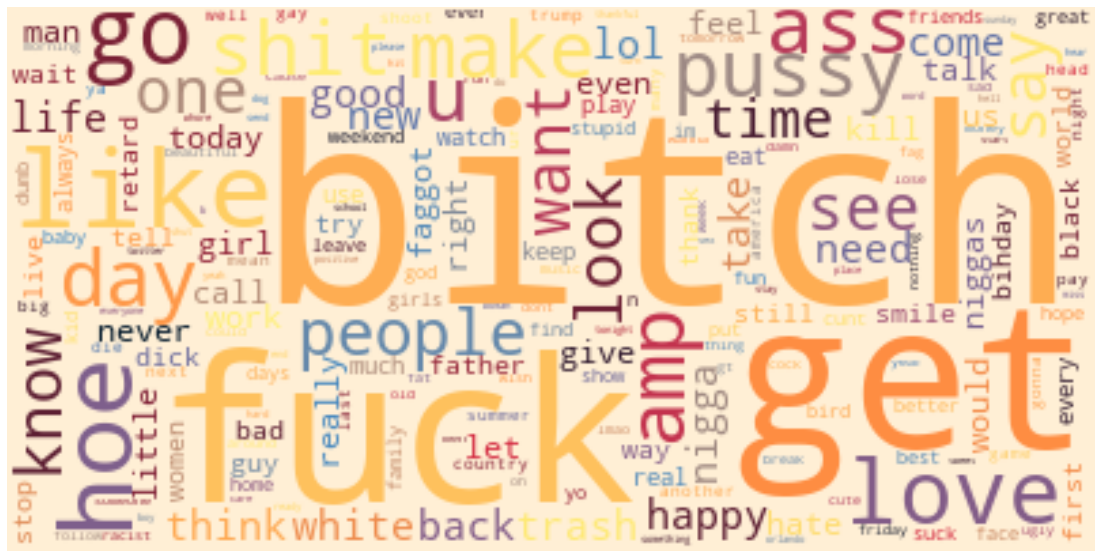

In [24]:
hero.visualization.wordcloud(df['clean sentence training'].apply(str))

#Insights

> Imbalanced Dataset 

✅ Solution : Add more data to potenially risky and risky category to make overall dataset balanced



> Readability Test : To check understanding level of text

✅ Solution : Average test score of all text sentences is 66.7 which lies in the range of 60-69 and it's standard text. This gives us the idea that text is normal or balanced and most of the audience will able understand the given text.



> Frequent words used in the sentence


✅ Solution : we can come with a conclusion that people quite offen use this top 20 words in their statement when they offensive or hateful or peaceful.









